In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
california = pd.read_csv(r"D:\California fire breakdown.csv")
california

_id  OBJECTID         * Damage  * Street Number  * Street Name  \
0            1         1        No Damage           8376.0   Quail Canyon   
1            2         2  Affected (1-9%)           8402.0   Quail Canyon   
2            3         3        No Damage           8430.0  Quail Canyon    
3            4         4        No Damage           3838.0    Putah Creek   
4            5         5        No Damage           3830.0    Putah Creek   
...        ...       ...              ...              ...            ...   
100225  100226    101217        No Damage          24198.0           Case   
100226  100227    101218        No Damage          24198.0           Case   
100227  100228    101219        No Damage          24198.0           Case   
100228  100229    101220        No Damage          24008.0         Malibu   
100229  100230    101221        No Damage          24016.0         Malibu   

       * Street Type (e.g. road, drive, lane, etc.)  \
0                                              Road   
1                                              Road   
2                                              Road   
3                                              Road   
4                                              Road   
...                                             ...   
100225                                        Court   
100226                                        Court   
100227                                        Court   
100228                                         Road   
100229                                         Road   

       Street Suffix (e.g. apt. 23, blding C)   * City State  Zip Code  ...  \
0                                         NaN  Winters    CA       NaN  ...   
1                                         NaN  Winters    CA       NaN  ...   
2                                         NaN  Winters    CA       NaN  ...   
3                                         NaN  Winters    CA       NaN  ...   
4                                         NaN  Winters    CA       NaN  ...   
...                                       ...      ...   ...       ...  ...   
100225                               blding A   Malibu    CA   90265.0  ...   
100226                               blding B   Malibu    CA   90265.0  ...   
100227                               blding C   Malibu    CA   90265.0  ...   
100228                                    NaN   Malibu    CA   90265.0  ...   
100229                                    NaN   Malibu    CA   90265.0  ...   

       Fire Name (Secondary)  APN (parcel) Assessed Improved Value (parcel)  \
0                      Quail    0101090290                         510000.0   
1                      Quail    0101090270                         573052.0   
2                      Quail    0101090310                         350151.0   
3                      Quail    0103010240                         134880.0   
4                      Quail    0103010220                         346648.0   
...                      ...           ...                              ...   
100225                   NaN  4458018039.0                        2249521.0   
100226                   NaN  4458018039.0                        2249521.0   
100227                   NaN  4458018039.0                        2249521.0   
100228                   NaN  4458009014.0                        5983875.0   
100229                   NaN  4458009009.0                         894805.0   

       Year Built (parcel)                    Site Address (parcel)  \
0                   1997.0  8376 QUAIL CANYON RD VACAVILLE CA 95688   
1                   1980.0  8402 QUAIL CANYON RD VACAVILLE CA 95688   
2                   2004.0  8430 QUAIL CANYON RD VACAVILLE CA 95688   
3                   1981.0     3838 PUTAH CREEK RD WINTERS CA 95694   
4                   1980.0     3830 PUTAH CREEK RD WINTERS CA 95694   
...                    ...                                      ...   
100225                 0.0    

In [11]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100230 entries, 0 to 100229
Data columns (total 47 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   _id                                                           100230 non-null  int64  
 1   OBJECTID                                                      100230 non-null  int64  
 2   * Damage                                                      100230 non-null  object 
 3   * Street Number                                               95810 non-null   float64
 4   * Street Name                                                 94744 non-null   object 
 5   * Street Type (e.g. road, drive, lane, etc.)                  87033 non-null   object 
 6   Street Suffix (e.g. apt. 23, blding C)                        44148 non-null   object 
 7   * City                                                  

In [12]:
import pandas as pd
california.rename(columns={
    "_id": "id",
    "OBJECTID": "object_id",
    "* Damage": "damage",
    "* Street Number": "street_number",
    "* Street Name": "street_name",
    "* Street Type (e.g. road, drive, lane, etc.)": "street_type",
    "Street Suffix (e.g. apt. 23, blding C)": "street_suffix",
    "* City": "city",
    "State": "state",
    "Zip Code": "zip_code",
    "* CAL FIRE Unit": "cal_fire_unit",
    "County": "county",
    "Community": "community",
    "Battalion": "battalion",
    "* Incident Name": "incident_name",
    "Incident Number (e.g. CAAEU 123456)": "incident_number",
    "Incident Start Date": "incident_start_date",
    "Hazard Type": "hazard_type",
    "If Affected 1-9% - Where did fire start?": "fire_start_location",
    "If Affected 1-9% - What started fire?": "fire_cause",
    "Structure Defense Actions Taken": "structure_defense_actions",
    "* Structure Type": "structure_type",
    "Structure Category": "structure_category",
    "# Units in Structure (if multi unit)": "multi_unit_count",
    "# of Damaged Outbuildings < 120 SQFT": "damaged_outbuildings",
    "# of Non Damaged Outbuildings < 120 SQFT": "non_damaged_outbuildings",
    "* Roof Construction": "roof_construction",
    "* Eaves": "eaves",
    "* Vent Screen": "vent_screen",
    "* Exterior Siding": "exterior_siding",
    "* Window Pane": "window_pane",
    "* Deck/Porch On Grade": "deck_porch_on_grade",
    "* Deck/Porch Elevated": "deck_porch_elevated",
    "* Patio Cover/Carport Attached to Structure": "patio_cover_carport_attached",
    "* Fence Attached to Structure": "fence_attached"
}, inplace=True)

print(california.columns)

Index(['id', 'object_id', 'damage', 'street_number', 'street_name',
       'street_type', 'street_suffix', 'city', 'state', 'zip_code',
       'cal_fire_unit', 'county', 'community', 'battalion', 'incident_name',
       'incident_number', 'incident_start_date', 'hazard_type',
       'fire_start_location', 'fire_cause', 'structure_defense_actions',
       'structure_type', 'structure_category', 'multi_unit_count',
       'damaged_outbuildings', 'non_damaged_outbuildings', 'roof_construction',
       'eaves', 'vent_screen', 'exterior_siding', 'window_pane',
       'deck_porch_on_grade', 'deck_porch_elevated',
       'patio_cover_carport_attached', 'fence_attached',
       'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
       'Fire Name (Secondary)', 'APN (parcel)',
       'Assessed Improved Value (parcel)', 'Year Built (parcel)',
       'Site Address (parcel)', 'GLOBALID', 'Latitude', 'Longitude', 'x', 'y'],
      dtype='obj

In [13]:
len(california)

100230

## We will Drop columns with more than 40% missing values

In [14]:
threshold = 0.40 * len(california)
california = california.dropna(thresh=threshold, axis=1)

In [15]:
len(california.columns)

37

In [16]:
california.isnull().sum()

id                                      0
object_id                               0
damage                                  0
street_number                        4420
street_name                          5486
street_type                         13197
street_suffix                       56082
city                                31614
state                                   7
zip_code                            52801
cal_fire_unit                           0
county                                 30
community                           47338
incident_name                           0
incident_number                         0
incident_start_date                     0
hazard_type                             0
structure_type                          0
structure_category                      0
roof_construction                     628
eaves                                1112
vent_screen                          1198
exterior_siding                       909
window_pane                       

## Fill numeric missing values with median

In [17]:
num_cols = california.select_dtypes(include=["number"]).columns
california[num_cols] = california[num_cols].fillna(california[num_cols].median())

In [18]:
california.isnull().sum()

id                                      0
object_id                               0
damage                                  0
street_number                           0
street_name                          5486
street_type                         13197
street_suffix                       56082
city                                31614
state                                   7
zip_code                                0
cal_fire_unit                           0
county                                 30
community                           47338
incident_name                           0
incident_number                         0
incident_start_date                     0
hazard_type                             0
structure_type                          0
structure_category                      0
roof_construction                     628
eaves                                1112
vent_screen                          1198
exterior_siding                       909
window_pane                       

## Fill categorical missing values with 'Unknown'


In [19]:
cat_cols = california.select_dtypes(include=["object"]).columns
california[cat_cols] = california[cat_cols].fillna("Unknown")

## Convert Data Types

In [20]:
california["incident_start_date"] = pd.to_datetime(california["incident_start_date"], errors="coerce")
california["zip_code"] = pd.to_numeric(california["zip_code"], errors="coerce", downcast="integer")

## Removing Duplicates

In [21]:
california = california.drop_duplicates()

## Standardize Categorical Data

In [22]:
california["damage"] = california["damage"].str.strip().str.lower()
california["county"] = california["county"].str.title()
california["hazard_type"] = california["hazard_type"].str.replace("_", " ").str.title()

# Exploratory Data Analysis (EDA)

#### Visualize Missing Values

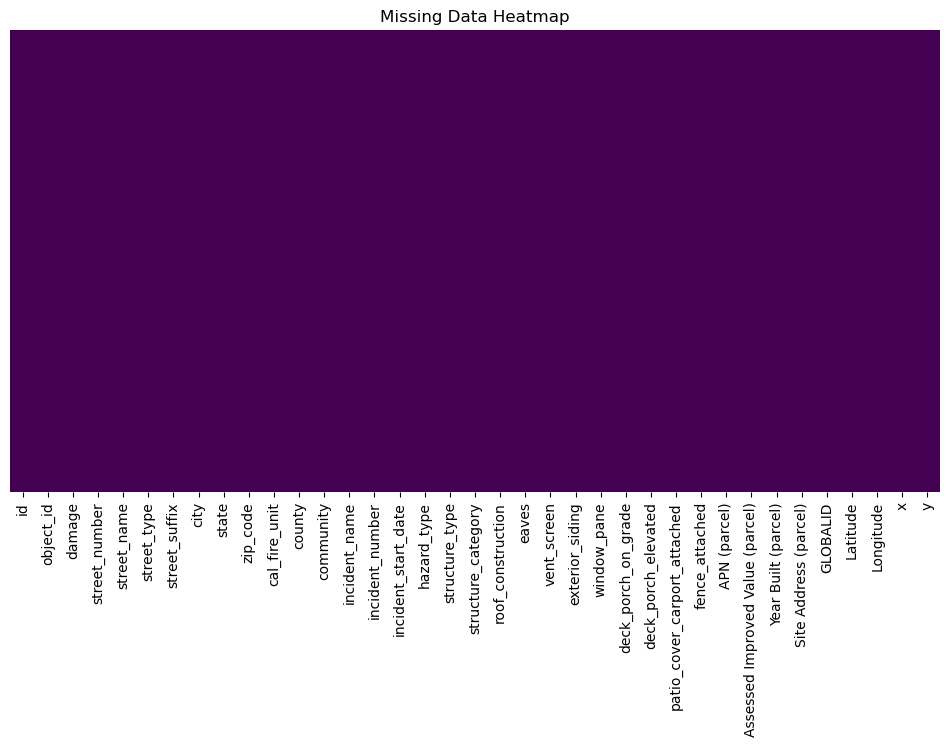

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(california.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

## Fire Incidents Over Time

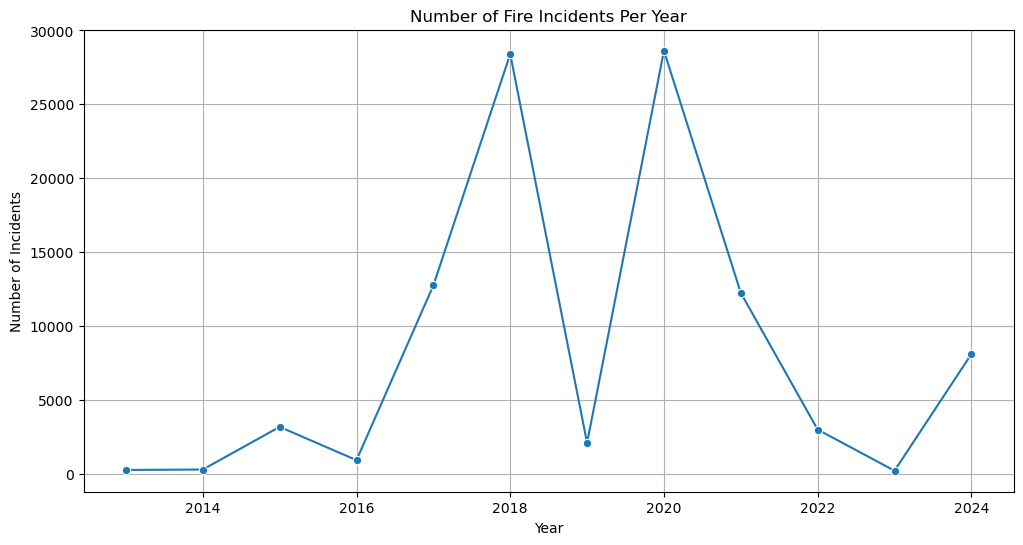

In [24]:
california["year"] = california["incident_start_date"].dt.year
yearly_counts = california["year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("Number of Fire Incidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid()
plt.show()


## Damage Type Distribution

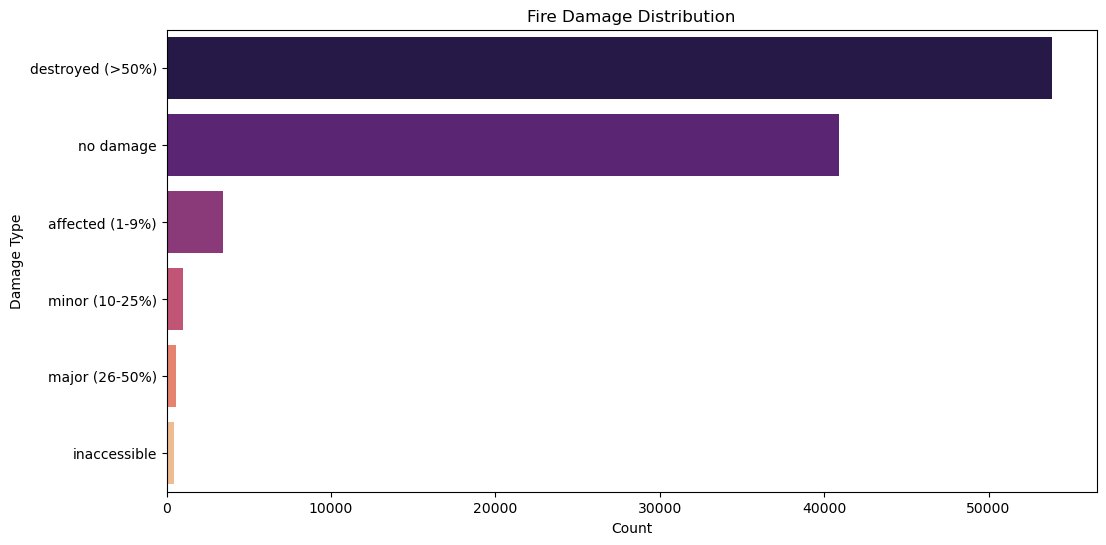

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=california, y="damage", order=california["damage"].value_counts().index, palette="magma")
plt.title("Fire Damage Distribution")
plt.xlabel("Count")
plt.ylabel("Damage Type")
plt.show()

## Fire Incidents by County

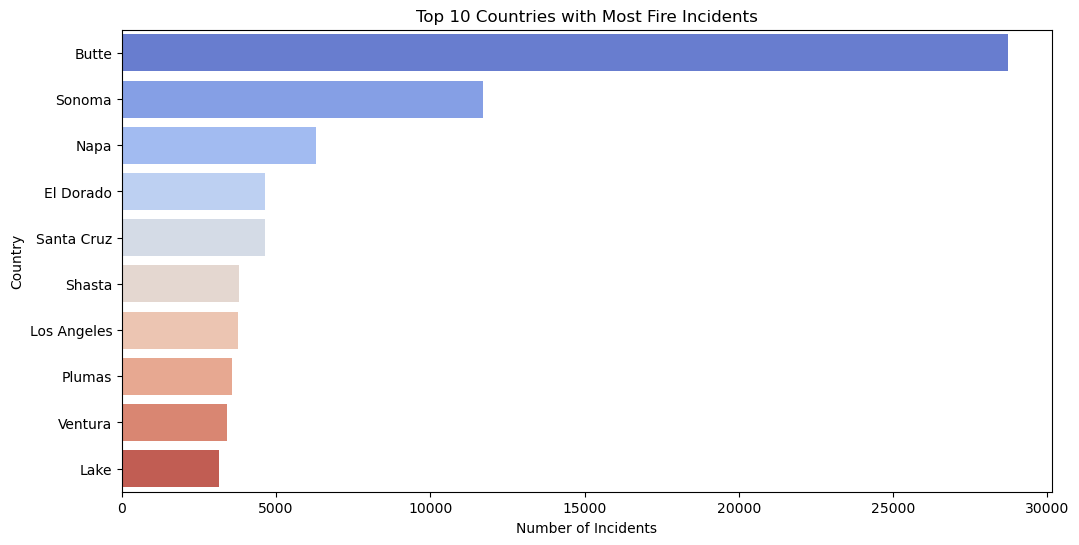

In [26]:
top_counties = california["county"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_counties.values, y=top_counties.index, palette="coolwarm")
plt.title("Top 10 Countries with Most Fire Incidents")
plt.xlabel("Number of Incidents")
plt.ylabel("Country")
plt.show()

## Fire Causes Distribution

In [27]:
# top_causes = california["fire_cause"].value_counts().head(10)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=top_causes.values, y=top_causes.index, palette="inferno")
# plt.title("Top 10 Fire Causes")
# plt.xlabel("Count")
# plt.ylabel("Cause")
# plt.show()

## Fire Incidents by Structure Type

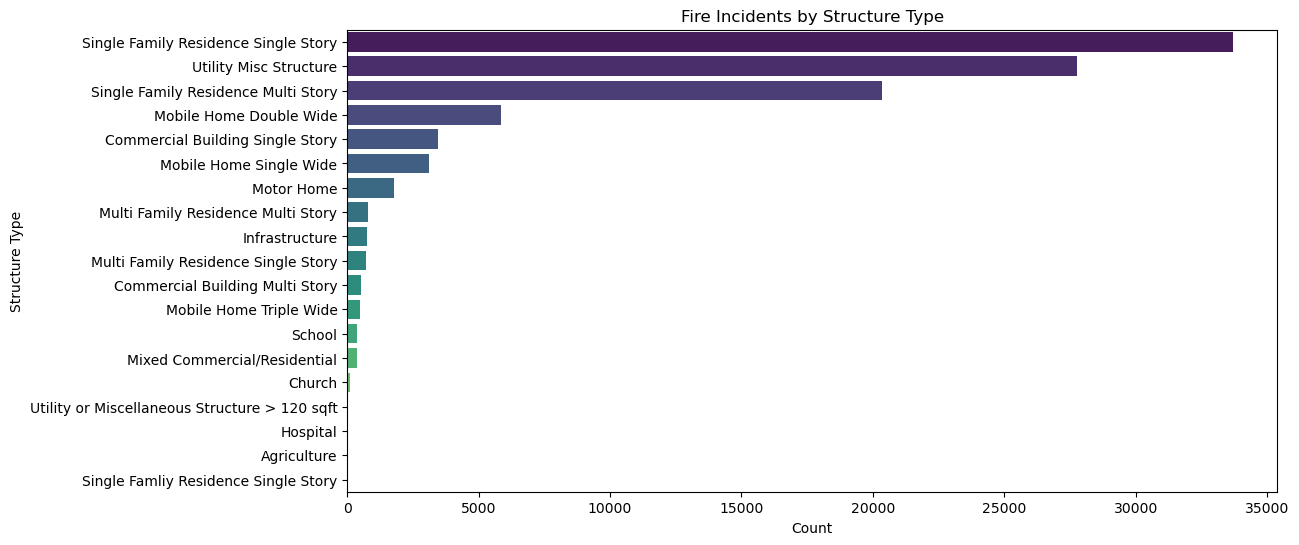

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(y=california["structure_type"], order=california["structure_type"].value_counts().index, palette="viridis")
plt.title("Fire Incidents by Structure Type")
plt.xlabel("Count")
plt.ylabel("Structure Type")
plt.show()

In [29]:
# import plotly.express as px

# # Group by year and cause of fire
# fire_cause_trends = california.groupby(["year", "fire_cause"]).size().reset_index(name="count")

# # Interactive Line Chart
# fig = px.line(
#     fire_cause_trends,
#     x="year",
#     y="count",
#     color="fire_cause",
#     markers=True,
#     title="Fire Causes Over the Years",
#     labels={"count": "Number of Fires"},
# )
# fig.show()

## High-Risk Counties for Fire Outbreaks

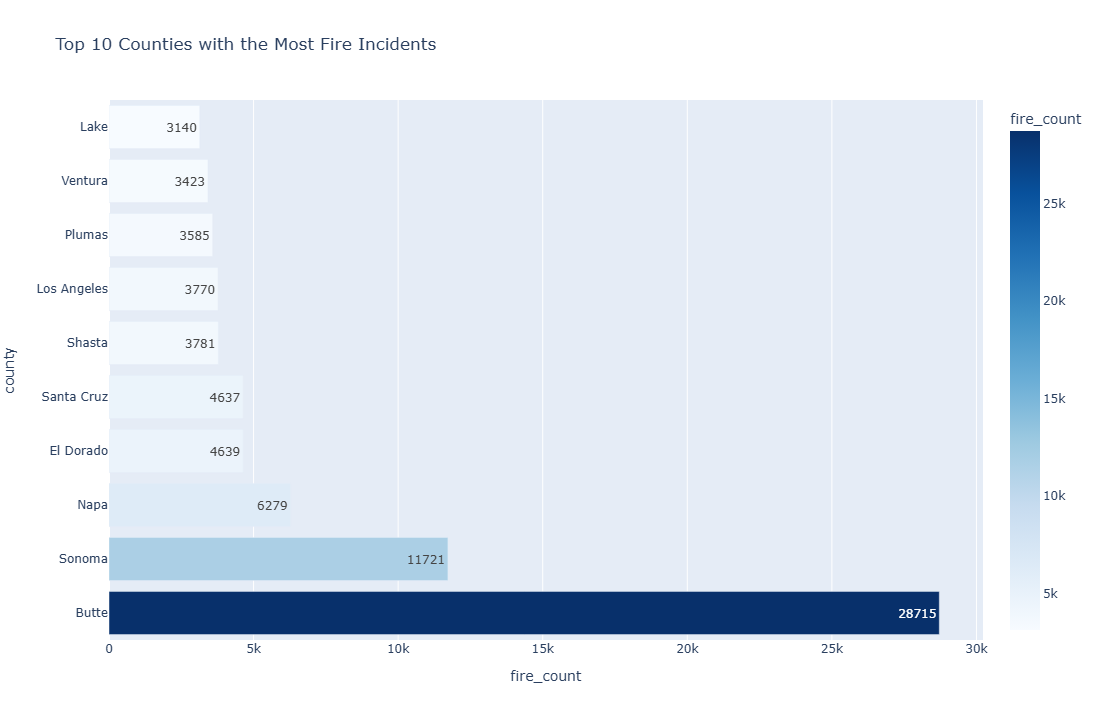

In [30]:
# Fire incidents by county
import plotly.express as px
county_fires = california["county"].value_counts().reset_index()
county_fires.columns = ["county", "fire_count"]

# Interactive Bar Chart
fig = px.bar(
    county_fires.head(10),
    x="fire_count",
    y="county",
    orientation="h",
    title="Top 10 Counties with the Most Fire Incidents",
    text="fire_count",
    color="fire_count",
    color_continuous_scale="blues",
)
fig.show()

## Fire Incidents by Month

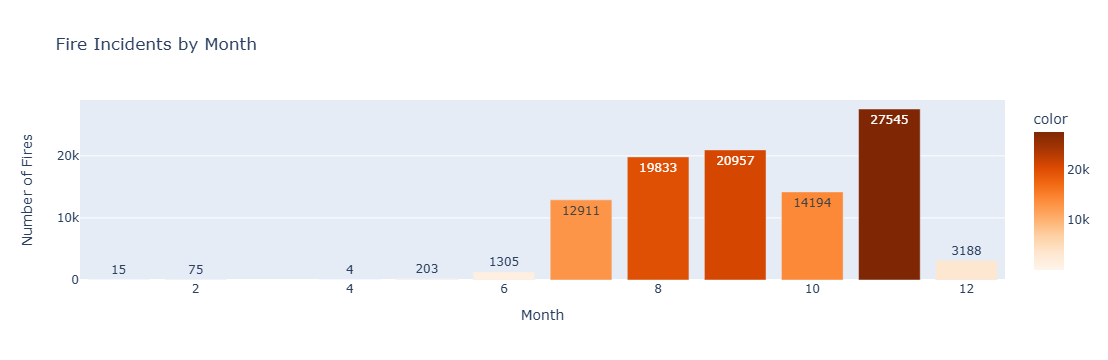

In [31]:
california["month"] = california["incident_start_date"].dt.month
monthly_fires = california["month"].value_counts().sort_index()

# Interactive Bar Chart
fig = px.bar(
    x=monthly_fires.index,
    y=monthly_fires.values,
    title="Fire Incidents by Month",
    labels={"x": "Month", "y": "Number of Fires"},
    text=monthly_fires.values,
    color=monthly_fires.values,
    color_continuous_scale="oranges",
)
fig.show()

## Impact of Fire on Different Structure Types

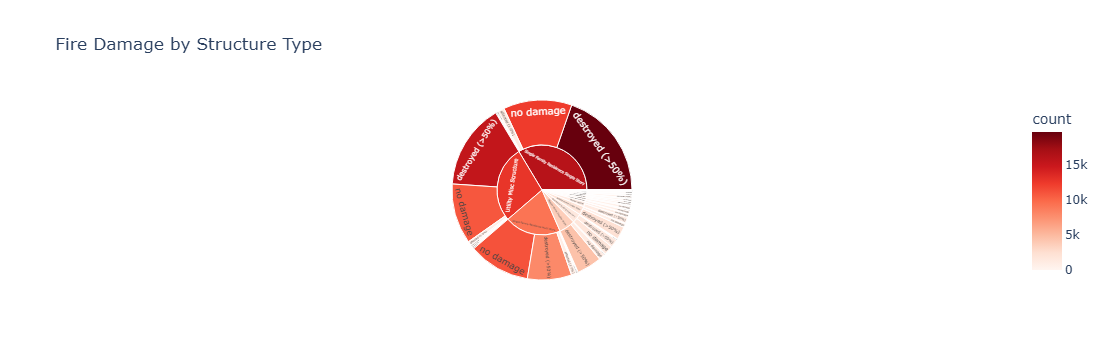

In [32]:
structure_damage = california.groupby("structure_type")["damage"].value_counts().reset_index(name="count")

# Interactive Sunburst Chart
fig = px.sunburst(
    structure_damage,
    path=["structure_type", "damage"],
    values="count",
    title="Fire Damage by Structure Type",
    color="count",
    color_continuous_scale="reds",
)
fig.show()

## Model Building

In [45]:
import pandas as pd
import numpy as np
import pickle
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# california.to_csv('pre_processed_california_data.csv',index=False)

In [47]:
california = pd.read_csv(r"C:\Users\rajat\Documents\Machine Learning Imarticus\California Wildfire Impact Analysis\pre_processed_california_data.csv")
california.head()

id  object_id           damage  street_number    street_name street_type  \
0   1          1        no damage         8376.0   Quail Canyon        Road   
1   2          2  affected (1-9%)         8402.0   Quail Canyon        Road   
2   3          3        no damage         8430.0  Quail Canyon         Road   
3   4          4        no damage         3838.0    Putah Creek        Road   
4   5          5        no damage         3830.0    Putah Creek        Road   

  street_suffix     city state  zip_code  ...  \
0       Unknown  Winters    CA         0  ...   
1       Unknown  Winters    CA         0  ...   
2       Unknown  Winters    CA         0  ...   
3       Unknown  Winters    CA         0  ...   
4       Unknown  Winters    CA         0  ...   

  Assessed Improved Value (parcel) Year Built (parcel)  \
0                         510000.0              1997.0   
1                         573052.0              1980.0   
2                         350151.0              2004.0   
3                         134880.0              1981.0   
4                         346648.0              1980.0   

                     Site Address (parcel)  \
0  8376 QUAIL CANYON RD VACAVILLE CA 95688   
1  8402 QUAIL CANYON RD VACAVILLE CA 95688   
2  8430 QUAIL CANYON RD VACAVILLE CA 95688   
3     3838 PUTAH CREEK RD WINTERS CA 95694   
4     3830 PUTAH CREEK RD WINTERS CA 95694   

                               GLOBALID   Latitude   Longitude             x  \
0  e1919a06-b4c6-476d-99e5-f0b45b070de8  38.474960 -122.044465 -1.358593e+07   
1  b090eeb6-5b18-421e-9723-af7c9144587c  38.477442 -122.043252 -1.358579e+07   
2  268da70b-753f-46aa-8fb1-327099337395  38.479358 -122.044585 -1.358594e+07   
3  64d4a278-5ee9-414a-8bf4-247c5b5c60f9  38.487313 -122.015115 -1.358266e+07   
4  1b44b214-01fd-4f06-b764-eb42a1ec93d7  38.485636 -122.016122 -1.358277e+07   

              y  year month  
0  4.646741e+06  2020     6  
1  4.647094e+06  2020     6  
2  4.647366e+06  2020     6  
3  4.648497e+06  2020     6  
4  4.648259e+06  2020     6  

[5 rows x 39 columns]

In [48]:
# Drop irrelevant columns
irrelevant_cols = [
    "id", "object_id", "street_number", "street_suffix", "zip_code", 
    "cal_fire_unit", "community", "incident_name", "incident_number", "incident_start_date", 
    "APN (parcel)", "Site Address (parcel)", "GLOBALID", "x", "y"
]
california.drop(columns=irrelevant_cols, inplace=True, errors='ignore')

In [49]:
# Handle missing values (Fill with most frequent or mean for numeric)
for col in california.columns:
    if california[col].dtype == "object":
        california[col].fillna(california[col].mode()[0], inplace=True)
    else:
        california[col].fillna(california[col].mean(), inplace=True)

In [50]:
# Convert categorical damage descriptions to labels
damage_mapping = {
    "destroyed (>50%)": "Destroyed",
    "no damage": "No Damage",
    "affected (1-9%)": "Minor Damage",
    "minor (10-25%)": "Minor Damage",
    "major (26-50%)": "Major Damage",
    "inaccessible": "Unknown"
}

In [51]:
california['damage'] = california['damage'].map(damage_mapping)
california = california[california['damage'] != "Unknown"]  # Remove 'Unknown' category if needed

In [52]:
california.damage.value_counts(dropna= False)

damage
Destroyed       53879
No Damage       40895
Minor Damage     4456
Major Damage      564
Name: count, dtype: int64

In [53]:
california.isnull().sum()

damage                              0
street_name                         0
street_type                         0
city                                0
state                               0
county                              0
hazard_type                         0
structure_type                      0
structure_category                  0
roof_construction                   0
eaves                               0
vent_screen                         0
exterior_siding                     0
window_pane                         0
deck_porch_on_grade                 0
deck_porch_elevated                 0
patio_cover_carport_attached        0
fence_attached                      0
Assessed Improved Value (parcel)    0
Year Built (parcel)                 0
Latitude                            0
Longitude                           0
year                                0
month                               0
dtype: int64

In [54]:
# Check if dataframe is empty after cleaning
if california.empty:
    raise ValueError("Dataset is empty after preprocessing. Check missing values and input data.")

In [55]:
# Encode categorical variables
label_encoders = {}
for col in california.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    california[col] = le.fit_transform(california[col])
    label_encoders[col] = le

In [56]:
# Normalize numerical features
scaler = StandardScaler()
numeric_cols = california.select_dtypes(include=["int64", "float64"]).columns
california[numeric_cols] = scaler.fit_transform(california[numeric_cols])

In [57]:
# Ensure no missing values in target column
california = california[california["damage"].notna()]

In [58]:
# Split into features (X) and target (y)
X = california.drop(columns=["damage"])  # Features
y = california["damage"].astype(str)  # Ensure y is categorical

In [59]:
# Check if target variable is empty or contains only one class
if y.nunique() < 2:
    raise ValueError("Target variable has less than two unique classes. Classification is not possible.")

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [61]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

In [62]:
# Train optimized Random Forest model
best_rf_model.fit(X_train, y_train)
rf_preds = best_rf_model.predict(X_test)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Optimized Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

Optimized Random Forest Accuracy: 0.9277017886667669
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10776
           1       0.25      0.04      0.06       113
           2       0.62      0.25      0.35       891
           3       0.93      0.97      0.95      8179

    accuracy                           0.93     19959
   macro avg       0.68      0.55      0.58     19959
weighted avg       0.92      0.93      0.92     19959



In [63]:
rf_importances = best_rf_model.feature_importances_

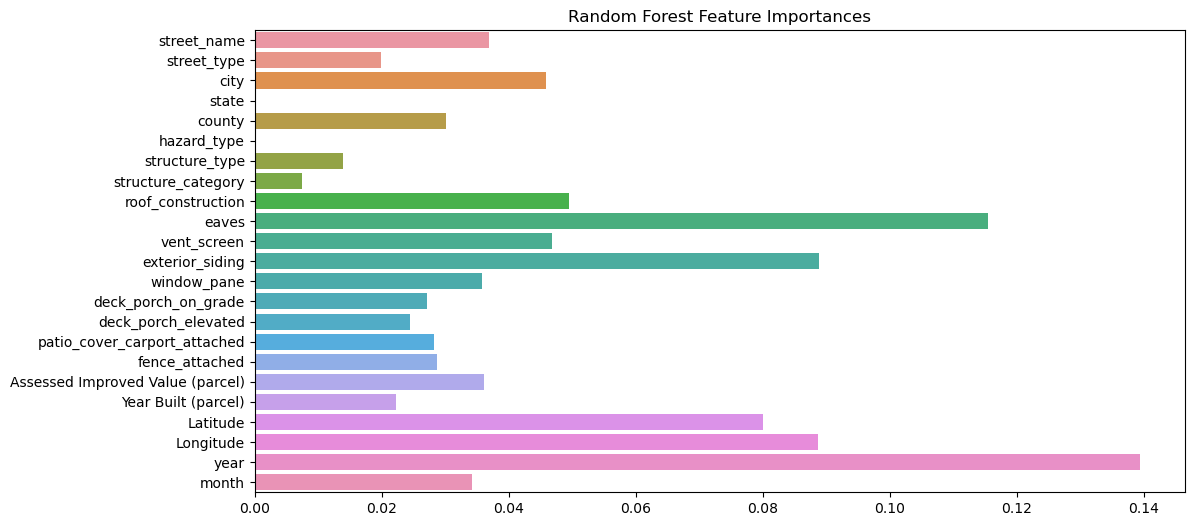

In [64]:
# Plot feature importance for Random Forest
feature_names = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_ importances, y=feature_names)
plt.title("Random Forest Feature Importances")
plt.show()

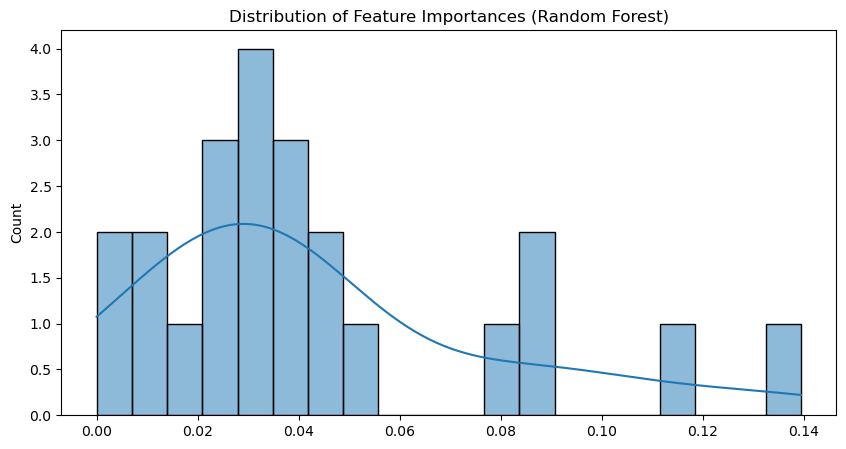

In [65]:
# Feature Importance Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(rf_importances, bins=20, kde=True)
plt.title("Distribution of Feature Importances (Random Forest)")
plt.show()

In [66]:
import sklearn
sklearn.__version__

'1.6.1'

In [67]:
import pickle

pickle.dump(best_rf_model, open(r"C:\Users\rajat\Documents\Machine Learning Imarticus\California Wildfire Impact Analysis\build.pkl",'wb')) 